# Data Cleaning Project

This Dataset has been downloaded from https://www.lendingclub.com/info/download-data.action to perform analysis and extract useful features for predictive modelling.
Thi is a messy dataset with lots of missing values and mixed data types. Let's look at all the variables and learn about the dataset in detail.

In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import re
import datetime

In [164]:
df = pd.read_csv('LoanStats3a.csv',skiprows=1,low_memory=False)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [165]:
df.shape

(42538, 145)

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42538 entries, 0 to 42537
Columns: 145 entries, id to settlement_term
dtypes: float64(115), object(30)
memory usage: 47.1+ MB


In [167]:
df.isnull().sum()

id                                            42535
member_id                                     42538
loan_amnt                                         3
funded_amnt                                       3
funded_amnt_inv                                   3
term                                              3
int_rate                                          3
installment                                       3
grade                                             3
sub_grade                                         3
emp_title                                      2629
emp_length                                     1115
home_ownership                                    3
annual_inc                                        7
verification_status                               3
issue_d                                           3
loan_status                                       3
pymnt_plan                                        3
url                                           42538
desc        

In [168]:
# We have lot of variables with 100% missing values and let's drop the variables with over 89% of missing values
df = df.loc[:, df.isnull().mean() < .8]
df.shape

(42538, 55)

Each of the remaining variables has missing values.

In [169]:
# We look at the variables by slicing 11 at a time
df_1 = df.iloc[:,:11]
df_1.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership
0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT
1,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT
2,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT
3,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT
4,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT


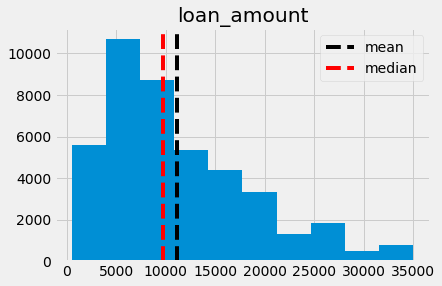

In [170]:
df_1['loan_amnt'].hist()
df_1['loan_amnt'].mean(),df_1['loan_amnt'].median()
plt.axvline(df_1['loan_amnt'].mean(),color='k',linestyle='dashed',label='mean')
plt.axvline(df_1['loan_amnt'].median(),color='red',linestyle='dashed',label='median')
plt.title('loan_amount')
plt.legend()
plt.show()

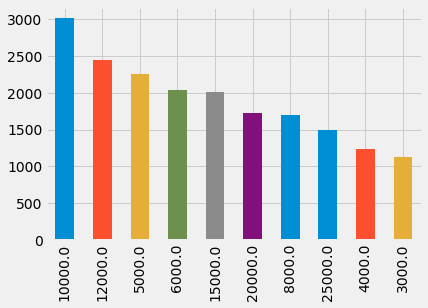

In [171]:
df_1['loan_amnt'].value_counts().head(10).plot(kind='bar')

In [172]:
df_1['loan_amnt'].fillna(df_1['loan_amnt'].median(),inplace=True)

C:\Users\prash\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


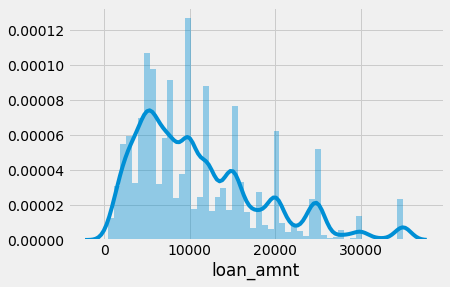

In [173]:
sns.distplot(df_1['loan_amnt'])

We can also see that there are no outliers in the 'loan_amnt' variable.

In [174]:
df_1['funded_amnt'].mean(),df_1['funded_amnt'].median()

(10821.585752909368, 9600.0)

In [175]:
df_1['funded_amnt'].fillna(df_1['funded_amnt'].median(),inplace=True)
df_1['int_rate'] = df_1['int_rate'].astype(str)
df_1['int_rate'] = df_1['int_rate'].apply(lambda x: x.replace('%','')).astype(float)
df_1['int_rate'].mean(),df_1['int_rate'].median()
df_1['int_rate'].fillna(df_1['int_rate'].mean(),inplace=True)
df_1['emp_length'] = df_1['emp_length'].str.extract('(\d+)').apply(lambda x: x.replace('+ years','')).astype(float)
df_1['emp_length'].fillna(df_1['emp_length'].median(),inplace=True)
df_1['funded_amnt_inv'].fillna(df_1['funded_amnt_inv'].median(),inplace=True)
df_1['installment'].fillna(df_1['installment'].median(),inplace=True)
df_1['grade'].fillna(df_1['grade'].mode(),inplace=True)

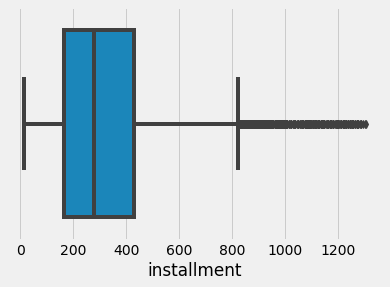

In [185]:
# Check for outliers in 'installment' as they have lot of impact on the outcome.
sns.boxplot(df_1['installment'])

In [186]:
df_1.dropna(subset=['term'],how='any',inplace=True)

In [187]:
df_1.isnull().sum()

loan_amnt             0
funded_amnt           0
funded_amnt_inv       0
term                  0
int_rate              0
installment           0
grade                 0
sub_grade             0
emp_title          2626
emp_length            0
home_ownership        0
dtype: int64

In [188]:
df_1.drop('emp_title', axis=1, inplace=True)

In [189]:
df_1.isnull().sum()

loan_amnt          0
funded_amnt        0
funded_amnt_inv    0
term               0
int_rate           0
installment        0
grade              0
sub_grade          0
emp_length         0
home_ownership     0
dtype: int64

In [190]:
df_2 = df.iloc[:,11:22]
df_2.head()

,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti
0,24000.0,Verified,Dec-2011,Fully Paid,n,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65
1,30000.0,Source Verified,Dec-2011,Charged Off,n,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00
2,12252.0,Not Verified,Dec-2011,Fully Paid,n,NaN,small_business,real estate business,606xx,IL,8.72
3,49200.0,Source Verified,Dec-2011,Fully Paid,n,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00
4,80000.0,Source Verified,Dec-2011,Fully Paid,n,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94


In [191]:
df_2.isnull().sum()

annual_inc                 7
verification_status        3
issue_d                    3
loan_status                3
pymnt_plan                 3
desc                   13296
purpose                    3
title                     16
zip_code                   3
addr_state                 3
dti                        3
dtype: int64

In [192]:
df_2['issue_d'] = df_2['issue_d'].astype('datetime64[ns]')

In [193]:
df_2['annual_inc'].mean() , df_2['annual_inc'].median()

(69136.55642025822, 59000.0)

In [194]:
df_2 = df_2.drop(['desc','zip_code'],1)

In [195]:
df_2['annual_inc'].fillna(df_2['annual_inc'].median(),inplace=True)

In [196]:
df_2['dti'].fillna(df_2['dti'].mean(),inplace=True) 

In [197]:
df_2.dropna(subset=['verification_status','issue_d','loan_status','pymnt_plan','purpose','title','addr_state'],how='any',inplace=True)

In [198]:
df_2.head()

,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,addr_state,dti
0,24000.0,Verified,2011-12-01,Fully Paid,n,credit_card,Computer,AZ,27.65
1,30000.0,Source Verified,2011-12-01,Charged Off,n,car,bike,GA,1.00
2,12252.0,Not Verified,2011-12-01,Fully Paid,n,small_business,real estate business,IL,8.72
3,49200.0,Source Verified,2011-12-01,Fully Paid,n,other,personel,CA,20.00
4,80000.0,Source Verified,2011-12-01,Fully Paid,n,other,Personal,OR,17.94


In [199]:
df_3 = df.iloc[:,25:35]
df_3.head()

,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt
0,NaN,3.0,0.0,13648.0,83.7%,9.0,f,0.0,0.0,5863.155187
1,NaN,3.0,0.0,1687.0,9.4%,4.0,f,0.0,0.0,1014.530000
2,NaN,2.0,0.0,2956.0,98.5%,10.0,f,0.0,0.0,3005.666844
3,35.0,10.0,0.0,5598.0,21%,37.0,f,0.0,0.0,12231.890000
4,38.0,15.0,0.0,27783.0,53.9%,38.0,f,0.0,0.0,4066.908161


In [200]:
df_3.isnull().sum()

mths_since_last_delinq    26929
open_acc                     32
pub_rec                      32
revol_bal                     3
revol_util                   93
total_acc                    32
initial_list_status           3
out_prncp                     3
out_prncp_inv                 3
total_pymnt                   3
dtype: int64

In [201]:
df_3 = df_3.drop(['mths_since_last_delinq','revol_util'],1)

In [202]:
df_3.head()

,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt
0,3.0,0.0,13648.0,9.0,f,0.0,0.0,5863.155187
1,3.0,0.0,1687.0,4.0,f,0.0,0.0,1014.530000
2,2.0,0.0,2956.0,10.0,f,0.0,0.0,3005.666844
3,10.0,0.0,5598.0,37.0,f,0.0,0.0,12231.890000
4,15.0,0.0,27783.0,38.0,f,0.0,0.0,4066.908161


In [203]:
df_3.fillna(df_3.median(),inplace=True)

In [281]:
df_3.fillna(df_3['initial_list_status'].mode(),inplace=True)

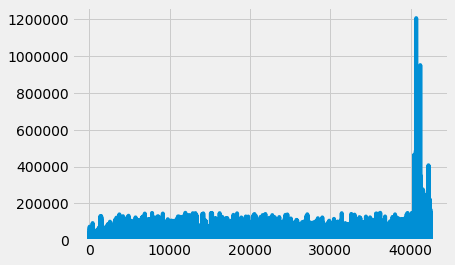

In [282]:
df_3['revol_bal'].plot(kind='area')

In [215]:
df_4 = df.iloc[:,35:44]
df_4.head()

,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d
0,5833.84,5000.00,863.16,0.00,0.0,0.00,Jan-2015,171.62,Oct-2018
1,1014.53,456.46,435.17,0.00,122.9,1.11,Apr-2013,119.66,Oct-2016
2,3005.67,2400.00,605.67,0.00,0.0,0.00,Jun-2014,649.91,Jun-2017
3,12231.89,10000.00,2214.92,16.97,0.0,0.00,Jan-2015,357.48,Apr-2016
4,4066.91,3000.00,1066.91,0.00,0.0,0.00,Jan-2017,67.30,Apr-2018


In [216]:
df_4.describe()

,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt
count,42535.000000,42535.000000,42535.000000,42535.000000,42535.00000,42535.000000,42535.000000
mean,11312.805189,9675.675936,2239.981444,1.516890,103.09148,14.401525,2613.245652
std,9038.544854,7105.750304,2585.057393,7.830064,736.10464,162.221310,4385.066535
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,4793.115000,4400.000000,657.100000,0.000000,0.00000,0.000000,211.050000
50%,8956.080000,8000.000000,1339.160000,0.000000,0.00000,0.000000,528.360000
75%,15544.335000,13499.995000,2803.090000,0.000000,0.00000,0.000000,3170.220000
max,58563.680000,35000.020000,23886.470000,209.000000,29623.35000,7002.190000,36115.200000


In [217]:
df_4.isnull().sum()

total_pymnt_inv             3
total_rec_prncp             3
total_rec_int               3
total_rec_late_fee          3
recoveries                  3
collection_recovery_fee     3
last_pymnt_d               86
last_pymnt_amnt             3
last_credit_pull_d          7
dtype: int64

In [218]:
df_4.dtypes

total_pymnt_inv            float64
total_rec_prncp            float64
total_rec_int              float64
total_rec_late_fee         float64
recoveries                 float64
collection_recovery_fee    float64
last_pymnt_d                object
last_pymnt_amnt            float64
last_credit_pull_d          object
dtype: object

In [219]:
df_4.fillna(df_4.median(),inplace=True)

In [220]:
df_4['last_pymnt_d'] = df_4['last_pymnt_d'].astype('datetime64[ns]')
df_4['last_credit_pull_d'] = df_4['last_credit_pull_d'].astype('datetime64[ns]')

In [221]:
df_4.head()

,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d
0,5833.84,5000.00,863.16,0.00,0.0,0.00,2015-01-01,171.62,2018-10-01
1,1014.53,456.46,435.17,0.00,122.9,1.11,2013-04-01,119.66,2016-10-01
2,3005.67,2400.00,605.67,0.00,0.0,0.00,2014-06-01,649.91,2017-06-01
3,12231.89,10000.00,2214.92,16.97,0.0,0.00,2015-01-01,357.48,2016-04-01
4,4066.91,3000.00,1066.91,0.00,0.0,0.00,2017-01-01,67.30,2018-04-01


In [249]:
df_5 = df.iloc[:,44:52]
df_5.head()

,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0


In [250]:
df_5.dtypes

collections_12_mths_ex_med    float64
policy_code                   float64
application_type               object
acc_now_delinq                float64
chargeoff_within_12_mths      float64
delinq_amnt                   float64
pub_rec_bankruptcies          float64
tax_liens                     float64
dtype: object

In [251]:
df_5.isnull().sum()

collections_12_mths_ex_med     148
policy_code                      3
application_type                 3
acc_now_delinq                  32
chargeoff_within_12_mths       148
delinq_amnt                     32
pub_rec_bankruptcies          1368
tax_liens                      108
dtype: int64

In [252]:
df_5['chargeoff_within_12_mths'].value_counts()

df_5['chargeoff_within_12_mths'].fillna(df_5['chargeoff_within_12_mths'].mode(),inplace=True)

In [253]:
df_5['tax_liens'].value_counts(normalize=True)

0.0    0.999976
1.0    0.000024
Name: tax_liens, dtype: float64

In [254]:
df_5['acc_now_delinq'].value_counts()

0.0    42502
1.0        4
Name: acc_now_delinq, dtype: int64

In [255]:
df_5= df_5.dropna(subset=['collections_12_mths_ex_med','policy_code','application_type','acc_now_delinq','delinq_amnt','pub_rec_bankruptcies','tax_liens'],how='any')

In [258]:
df_5.dropna(how='any',inplace=True)

In [230]:
df_6 = df.iloc[:,52:]
df_6.head()

,hardship_flag,disbursement_method,debt_settlement_flag
0,N,Cash,N
1,N,Cash,N
2,N,Cash,N
3,N,Cash,N
4,N,Cash,N


In [231]:
df_6.dtypes

hardship_flag           object
disbursement_method     object
debt_settlement_flag    object
dtype: object

In [232]:
df_6 = df_6.dropna(subset=['hardship_flag','disbursement_method','debt_settlement_flag'])

In [285]:
data = pd.concat([df_1,df_2,df_3,df_4,df_5,df_6],1)
data.shape

(42538, 47)

In [278]:
data.dropna(how='any',inplace=True)

In [283]:
data=data.loc[:, ~data.columns.str.contains(' ')]

In [284]:
data.to_csv('clean_data.csv')